In [58]:
import numpy as np
import pandas as pd
import yfinance as yf

import matplotlib.pyplot as plt


%matplotlib inline  

In [16]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [17]:
market_ticker = '^GSPC'
stock_ticker = 'acn'

stime='2022-01-01'
ftime=None

In [21]:
def get_data_from_ticker(tick, stime, ftime, interval='1d'):
    ticker = yf.Ticker(tick)
    # df = ticker.history(start='2021-01-01', end='2022-06-30')
    # df = ticker.history(start='2021-01-01', end='2022-07-26')
    # df = ticker.history(start='2020-01-01', end='2021-01-01')
    # df = ticker.history(start='2022-05-28')
    df = ticker.history(start=stime, end=ftime, interval=interval)
    x = pd.DataFrame(df)
    x.rename(columns={"Close": tick}, inplace=True)
    z = x.drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
    return z

gf = pd.DataFrame(get_data_from_ticker(market_ticker, stime, ftime))
sf = pd.DataFrame(get_data_from_ticker(stock_ticker, stime, ftime))
gf[stock_ticker] = sf[stock_ticker]


gf.head(3)

,^GSPC,acn
Date,,
2021-12-31,4766.180176,408.970642
2022-01-03,4796.560059,401.729431
2022-01-04,4793.540039,398.858551


In [23]:
def add_percent_update(tick):
    """ date stock's or market's update"""
    gf_copy = gf.copy(deep=True)
    gf_copy = pd.DataFrame(gf_copy.drop(gf.index[0]))
    gf_copy_v = gf_copy[tick].values
    gf_v = gf.copy(deep=True)
    gf_vv = gf_v[tick].values

    for i in range(len(gf_copy)):
        gf_vv[i] = (gf_copy_v[i] - gf_vv[i]) / (gf_vv[i] / 100)

    gf_vv = numpy.insert(gf_vv, 0, 0)
    gf_vv = numpy.delete(gf_vv, -1)
    return gf_vv

gf[f"% update {market_ticker}"] = add_percent_update(market_ticker)

gf.head(3)

,^GSPC,acn,% update ^GSPC
Date,,,
2021-12-31,4766.180176,408.970642,0.000000
2022-01-03,4796.560059,401.729431,0.637405
2022-01-04,4793.540039,398.858551,-0.062962


(array([ 1.,  2.,  1.,  2.,  2.,  2.,  3.,  4.,  3.,  5.,  9.,  7., 10.,
        14., 23., 15., 18., 18., 15., 12.,  8., 11.,  8., 12.,  5.,  7.,
         4.,  8.,  5.,  3.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.]),
 array([-4.32366134, -4.0769836 , -3.83030585, -3.58362811, -3.33695036,
        -3.09027262, -2.84359487, -2.59691713, -2.35023938, -2.10356164,
        -1.8568839 , -1.61020615, -1.36352841, -1.11685066, -0.87017292,
        -0.62349517, -0.37681743, -0.13013969,  0.11653806,  0.3632158 ,
         0.60989355,  0.85657129,  1.10324904,  1.34992678,  1.59660453,
         1.84328227,  2.08996001,  2.33663776,  2.5833155 ,  2.82999325,
         3.07667099,  3.32334874,  3.57002648,  3.81670423,  4.06338197,
         4.31005971,  4.55673746,  4.8034152 ,  5.05009295,  5.29677069,
         5.54344844]),
 <BarContainer object of 40 artists>)

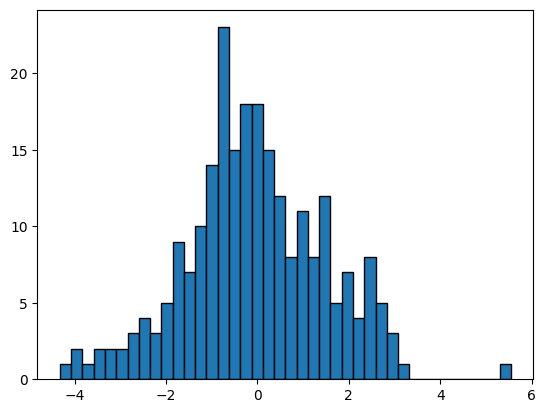

In [61]:
plt.hist(list(gf['% update ^GSPC'].values), bins=40, edgecolor='black')